None


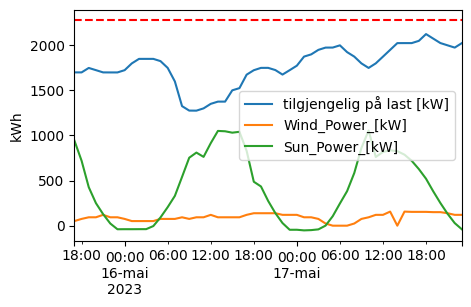

In [3]:
import pandas as pd
from sol_vinkel_kalkulator_55_timer import df_data
from Nett_data import df_siste_aar
import math
import locale



df_last = pd.merge(df_data,df_siste_aar)

#sun_pro = input("Hvor mange kvadratmeter solcelle har dere?:")
#print(sun_pro)
#wind_pro = input("Hvor mange Hvo mange vindturbiner har dere?:")
#print(wind_pro)

Areal_panel = 8000
r = 0.209
pr = 0.95

vind_turbinder = 30
#sun_pro = int(sun_pro)
#wind_pro = int(wind_pro)

locale.setlocale(locale.LC_TIME, 'no_NB') 

df_wind = pd.read_excel(r'Vind_data.xlsx', engine='openpyxl')
df_wind = df_wind.rename(columns={'Vind hastigehet (m/s)': 'wind_speed' , 'Effekt i (kw)': 'Wind_Power_[kW]'})
df = pd.merge(df_data, df_wind, on = 'wind_speed')

df['Sun_Power_[kW]'] =  df.apply(lambda row: Areal_panel*(r + 0.0035*(25-row['air_temperature']))*(990*math.sin(row['sea_rad'])-30)*(1-(0.75*row['cloud_area_fraction']/100)**3.4)*pr/1000, axis=1)

df = df.drop(columns=['air_temperature', 'wind_speed', 'cloud_area_fraction','sea_deg', 'sea_rad'])

df['Wind_Power_[kW]'] = df['Wind_Power_[kW]']*vind_turbinder

df.sort_values(by='time', inplace = True)

print(df.sort_values(by='time', inplace = True))

df_pro = pd.merge(df_siste_aar, df , on='time')

df_sum = pd.DataFrame()
df_sum['time'] = df_pro['time']
df_sum['total_power'] = df_pro['Sun_Power_[kW]'] + df_pro['Wind_Power_[kW]'] + df_pro['tilgjengelig på last [kW]']
gjennom = df_sum['total_power'].sum()/len(df_sum.index)



ax =df_pro.plot(x='time', figsize=(5, 3), ylabel="kWh", xlabel="")
ax.axhline(gjennom, color="red", linestyle="--")